In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import joblib
from xgboost import XGBRFRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [168]:
df=pd.read_csv('/home/yash/Data/kaggle_data/Nuclear data.csv')
df
#Imported the dataset which contained the data point 

,Energy Theo,Energy Expt,Log ft theo,Log ft expt
0,1306,1636,4.309,5.07
1,2606,4266,4.997,5.80
2,0,247,3.921,4.25
3,2452,2497,5.173,5.30
4,1285,1495,5.731,5.70
...,...,...,...,...
68,3105,3020,6.788,5.50
69,617,686,3.746,5.60
70,844,965,4.202,5.20
71,1487,1504,5.444,5.60


Text(0, 0.5, 'Theoretical Energy')

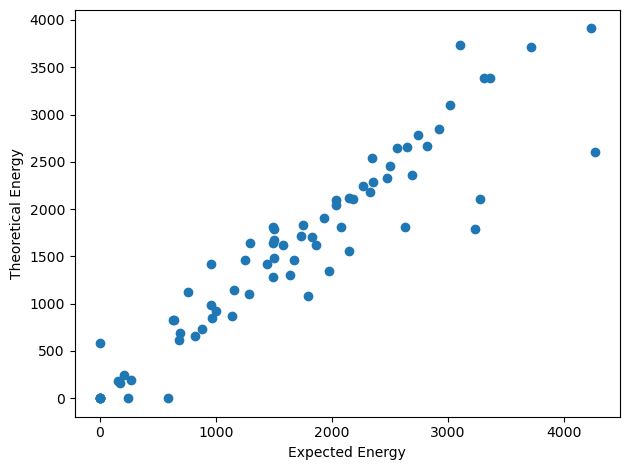

In [169]:
plt.scatter(df['Energy Expt'],df['Energy Theo'])
plt.xlabel('Expected Energy')
plt.ylabel('Theoretical Energy')
#This is the scatter plot of the data point that we have to work with

Text(0, 0.5, 'Theoretical Energy')

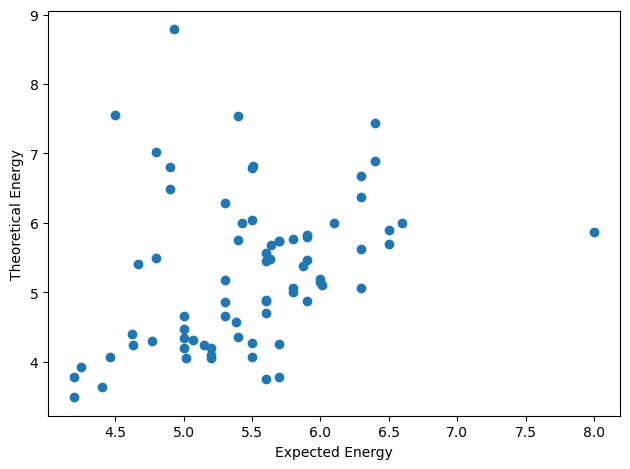

In [170]:
plt.scatter(df['Log ft expt'],df['Log ft theo'])
plt.xlabel('Expected Energy')
plt.ylabel('Theoretical Energy')
#This is the scatter plot of the data point that we have to work with

In [171]:
lin=LinearRegression()
lin_log_ft=LinearRegression()

In [172]:
lin.fit(df[['Energy Expt']],df[['Energy Theo']])

LinearRegression()

In [173]:
slope_energy=lin.coef_#slope of the best fit line 

intercep_energy=lin.intercept_#y intercept of the best fit line 

Text(0, 0.5, 'Theoretical Energy')

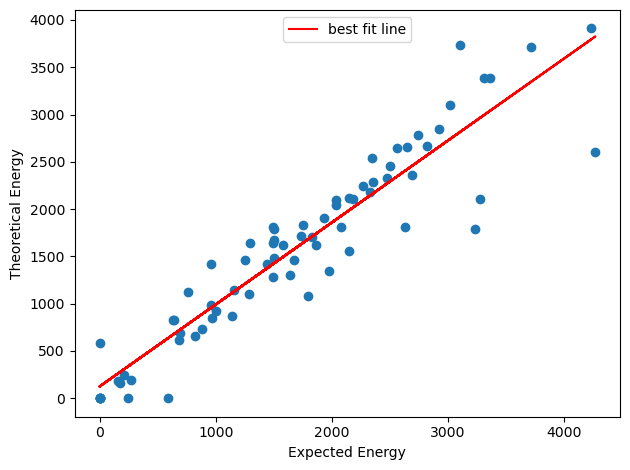

In [174]:
plt.scatter(df['Energy Expt'],df['Energy Theo'])
plt.rcParams["figure.autolayout"] = True

plt.plot(df['Energy Expt'],lin.predict(df[['Energy Expt']]),color='red',label='best fit line')
#Ploting the best fit line for the energy value

leg = plt.legend(loc='upper center')
plt.xlabel('Expected Energy')
plt.ylabel('Theoretical Energy')
#print the legend of the graph

In [175]:
print('slope:{} y intercept:{}'.format(slope_energy,intercep_energy))

slope:[[0.86748487]] y intercept:[124.14519704]


## Things left to do
### 1) Average error in the slope 
### 2) Putting in the log ft value 
### 3) Calculating the R(GT) value 

In [176]:
lin_log_ft.fit(df[['Log ft expt']],df[['Log ft theo']])

LinearRegression()

Text(0, 0.5, 'Theoretical Energy')

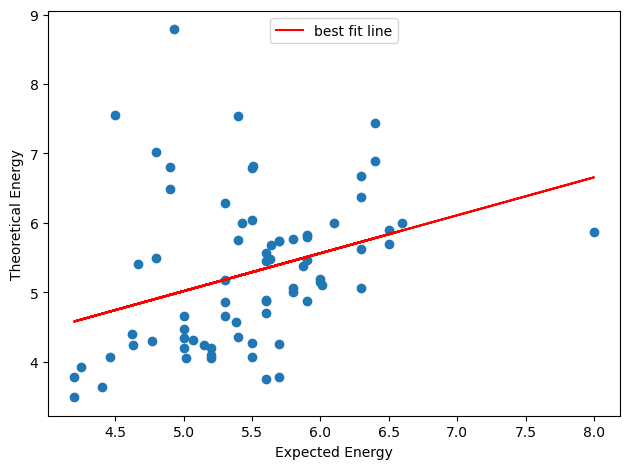

In [177]:
plt.scatter(df['Log ft expt'],df['Log ft theo'])
plt.rcParams["figure.autolayout"] = True

plt.plot(df['Log ft expt'],lin_log_ft.predict(df[['Log ft expt']]),color='red',label='best fit line')
#Ploting the best fit line for the energy value

leg = plt.legend(loc='upper center')
plt.xlabel('Expected Energy')
plt.ylabel('Theoretical Energy')
#print the legend of the graph

In [178]:
df_test=pd.read_csv('/home/yash/Data//kaggle_data/Nuclear data_test.csv')
df_test

,RGT Expt,RGT Theo
0,0.536584,0.519625
1,0.034761,0.599895
2,0.086315,0.095568
3,0.092489,0.110448
4,0.041313,0.068579
...,...,...
83,0.037206,0.025097
84,0.005504,0.017145
85,0.002357,0.003741
86,0.007160,0.007599


Text(0, 0.5, 'Theoretical Energy')

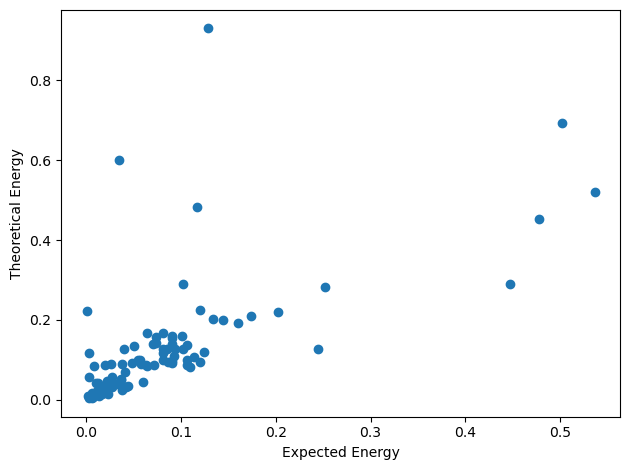

In [179]:
plt.scatter(df_test['RGT Expt'],df_test['RGT Theo'])
plt.xlabel('Expected Energy')
plt.ylabel('Theoretical Energy')
#slope =0.069+-0.020
#This is the scatter plot of the data point that we have to work with

In [180]:
Linear_regression_RGT=LinearRegression()

In [181]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(df_test[['RGT Theo']],df_test[['RGT Expt']],test_size=0.40)

In [182]:
Linear_regression_RGT.fit(Xtrain,Ytrain)

LinearRegression()

In [183]:
slope_model=Linear_regression_RGT.coef_
slope_model

array([[0.67869262]])

In [184]:
intercept_model=Linear_regression_RGT.intercept_
intercept_model

array([0.00537675])

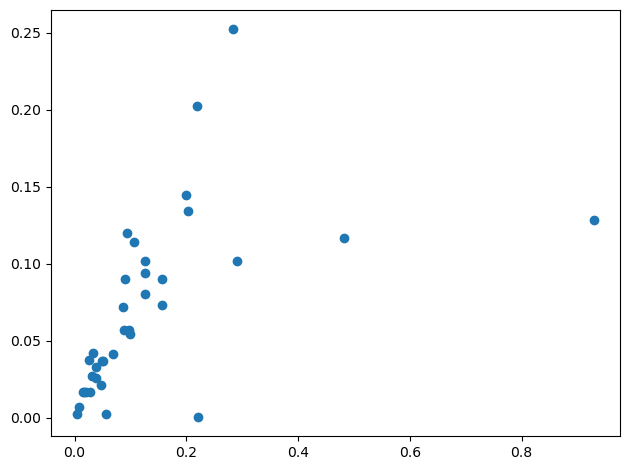

In [185]:
plt.scatter(Xtest,Ytest)

In [186]:
Y_pred=Linear_regression_RGT.predict(df_test[['RGT Theo']])

In [187]:
df_test.columns

Index(['RGT Expt', 'RGT Theo'], dtype='object')

Text(0, 0.5, 'Theoretical Energy')

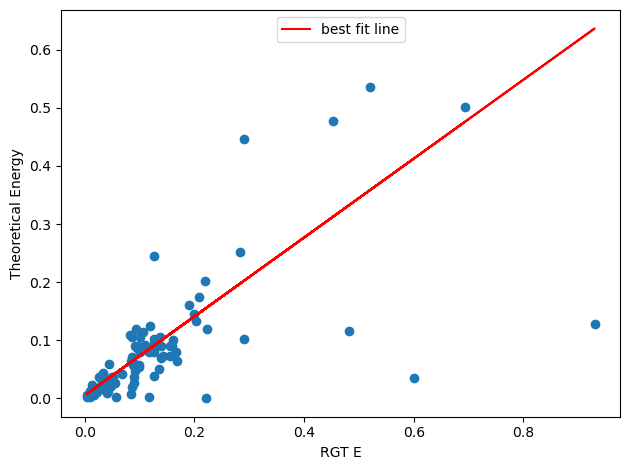

In [188]:
plt.scatter(df_test['RGT Theo'],df_test['RGT Expt'])
plt.rcParams["figure.autolayout"] = True

plt.plot(df_test[['RGT Theo']],Linear_regression_RGT.predict(df_test[['RGT Theo']]),color='red',label='best fit line')
#Ploting the best fit line for the energy value

leg = plt.legend(loc='upper center')
plt.xlabel('RGT E')
plt.ylabel('Theoretical Energy')
#print the legend of the graph

In [189]:
def function_slope():
    slope=0
    slope_cal_not_done=True
    while(slope_cal_not_done):
        Xtrain,Xtest,Ytrain,Ytest = train_test_split(df_test[['RGT Theo']],df_test[['RGT Expt']],test_size=0.40)
        Linear_regression_RGT.fit(Xtrain,Ytrain)
        slope=Linear_regression_RGT.coef_
        slope
        print (slope)
        if((slope>0.66) and(slope<0.67)):
            slope_cal_not_done=False

In [190]:
function_slope()

[[0.29481691]]
[[0.37587135]]
[[0.38771223]]
[[0.53577262]]
[[0.84767853]]
[[0.55256729]]
[[0.39479389]]
[[0.3668353]]
[[0.36610616]]
[[0.34003769]]
[[0.61218638]]
[[0.41719313]]
[[0.32614094]]
[[0.4097781]]
[[0.43690821]]
[[0.30342668]]
[[0.39127806]]
[[0.23285839]]
[[0.75378805]]
[[0.56053133]]
[[0.53986735]]
[[0.29898611]]
[[0.71864751]]
[[0.25001158]]
[[0.76899561]]
[[0.62299374]]
[[0.26476803]]
[[0.34521497]]
[[0.27131444]]
[[0.35742615]]
[[0.54108138]]
[[0.61349967]]
[[0.45175032]]
[[0.34704815]]
[[0.46714873]]
[[0.64971321]]
[[0.33840268]]
[[0.39543542]]
[[0.20284068]]
[[0.5150887]]
[[0.41239517]]
[[0.14401842]]
[[0.47613088]]
[[0.75151627]]
[[0.42869135]]
[[0.20753732]]
[[0.79011981]]
[[0.44994584]]
[[0.26693164]]
[[0.38887439]]
[[0.21569955]]
[[0.299291]]
[[0.30560968]]
[[0.34694803]]
[[0.43704389]]
[[0.41071449]]
[[0.34812603]]
[[0.31580087]]
[[0.41490943]]
[[0.39817183]]
[[0.41776914]]
[[0.59553523]]
[[0.86154757]]
[[0.37377039]]
[[0.33204549]]
[[0.36665419]]
[[0.33041781]]


Text(0, 0.5, 'RGT Expterimental')

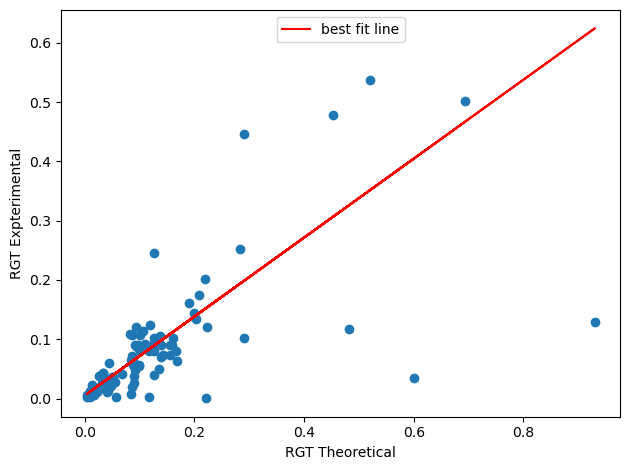

In [191]:
plt.scatter(df_test['RGT Theo'],df_test['RGT Expt'])
plt.rcParams["figure.autolayout"] = True

plt.plot(df_test['RGT Theo'],Linear_regression_RGT.predict(df_test[['RGT Theo']]),color='red',label='best fit line')
#Ploting the best fit line for the energy value

leg = plt.legend(loc='upper center')
plt.xlabel('RGT Theoretical')
plt.ylabel('RGT Expterimental')
#print the legend of the graph

joblib.dump(Linear_regression_RGT,"Linear_Regression_RGT_slope_0.665.joblib")

In [192]:
Nuclear_half_live =pd.read_csv('/home/yash/Data//kaggle_data/Nuclear half life.csv')

In [193]:
Nuclear_half_live

,Half life theo,Half life expt,mass number,Name_element,B_GT
0,251.90,460.0,52,SC,0.1004
1,268.87,461.0,53,SC,0.1400
2,186.70,86.0,54,SC,0.8950
3,18.51,22.0,55,SC,0.0902
4,1.56,11.0,56,SC,0.7990
...,...,...,...,...,...
74,393.00,570.0,76,Ga,0.2640
75,110.00,208.0,77,Ga,0.0680
76,51.00,147.0,78,Ga,0.2670
77,450.88,995.0,79,Ga,0.0560


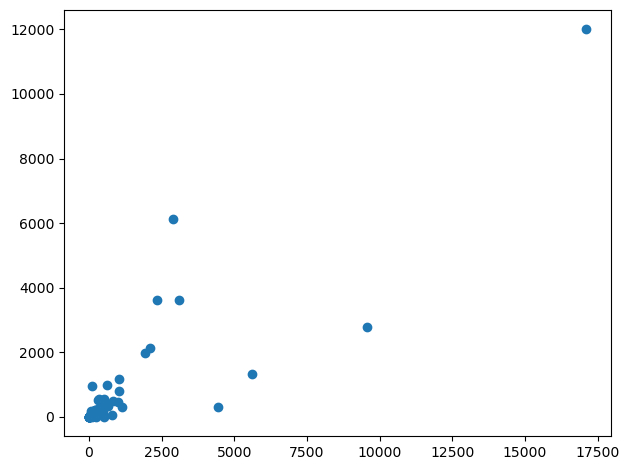

In [194]:
plt.scatter(Nuclear_half_live['Half life expt'],Nuclear_half_live['Half life theo'])

In [195]:
y_pred=Linear_regression_RGT.predict(df_test[['RGT Theo']])

In [196]:
MeanSquaredError=mean_squared_error(df_test[['RGT Expt']],y_pred)

In [197]:
MeanSquaredError

0.007541413731374778

In [198]:
dummy=pd.get_dummies(Nuclear_half_live["Name_element"])
dummy

,Co,Cr,Cu,Fe,Ga,Mn,Ni,SC,Ti,V,Zn
0,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
74,False,False,False,False,True,False,False,False,False,False,False
75,False,False,False,False,True,False,False,False,False,False,False
76,False,False,False,False,True,False,False,False,False,False,False
77,False,False,False,False,True,False,False,False,False,False,False


In [199]:
dummy.replace(False,'0',inplace=True)
dummy.replace(True,'1',inplace=True)

In [200]:
dummy

,Co,Cr,Cu,Fe,Ga,Mn,Ni,SC,Ti,V,Zn
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
74,0,0,0,0,1,0,0,0,0,0,0
75,0,0,0,0,1,0,0,0,0,0,0
76,0,0,0,0,1,0,0,0,0,0,0
77,0,0,0,0,1,0,0,0,0,0,0


In [201]:
Nuclear_half_live=pd.concat([Nuclear_half_live,dummy],axis=1)

In [202]:
Nuclear_half_live.drop(['Name_element'],axis='columns',inplace=True)

In [203]:
Nuclear_half_live

,Half life theo,Half life expt,mass number,B_GT,Co,Cr,Cu,Fe,Ga,Mn,Ni,SC,Ti,V,Zn
0,251.90,460.0,52,0.1004,0,0,0,0,0,0,0,1,0,0,0
1,268.87,461.0,53,0.1400,0,0,0,0,0,0,0,1,0,0,0
2,186.70,86.0,54,0.8950,0,0,0,0,0,0,0,1,0,0,0
3,18.51,22.0,55,0.0902,0,0,0,0,0,0,0,1,0,0,0
4,1.56,11.0,56,0.7990,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,393.00,570.0,76,0.2640,0,0,0,0,1,0,0,0,0,0,0
75,110.00,208.0,77,0.0680,0,0,0,0,1,0,0,0,0,0,0
76,51.00,147.0,78,0.2670,0,0,0,0,1,0,0,0,0,0,0
77,450.88,995.0,79,0.0560,0,0,0,0,1,0,0,0,0,0,0


In [204]:
import tensorflow as tf
from tensorflow import keras

In [205]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [206]:
mse=keras.losses.MeanSquaredError()
optimzer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

In [217]:
Nuclear_train_x,Nuclear_test_x,Nuclear_train_y,Nuclear_test_y=train_test_split(Nuclear_half_live[['mass number','B_GT']],Nuclear_half_live['Half life expt'],test_size=0.2)

In [220]:
Nuclear_train_x[:5]

,mass number,B_GT
54,74,0.545
53,73,0.056
73,75,0.019
6,58,1.386
76,78,0.267


In [208]:
xg_model=XGBRFRegressor(n_estimators=1000,num_parallel_tree=10)

Nuclear_train_x,Nuclear_train_y=Scaler_max.fit_transform([[Nuclear_train_x]])
Nuclear_train_x.reshape(-1,63,)
Nuclear_train_y.reshape(-1,63,)

In [209]:
xg_model.fit(Nuclear_train_x,Nuclear_train_y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=1000, n_jobs=None, num_parallel_tree=10,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [210]:
Scaler_max=MinMaxScaler()

new_dataframe=pd.concat([Nuclear_half_live,df_test],axis=1)
new_dataframem

In [229]:
mean_absolute_error_done=True
mean_absolute_error_value=1000
i=0
error=0
min_error=1000000
while mean_absolute_error_done:
    if (mean_absolute_error_value>100):
        Nuclear_train_x,Nuclear_test_x,Nuclear_train_y,Nuclear_test_y=train_test_split(Nuclear_half_live['mass number'],Nuclear_half_live['Half life expt'],test_size=0.2)
        xg_model.fit(Nuclear_train_x,Nuclear_train_y)
        predictions = xg_model.predict(Nuclear_test_x)
        error=mean_absolute_error(predictions, Nuclear_test_y)
        print("Mean Absolute Error : " + str(error))
        if(error<min_error):
            min_error=error
        i+=1
    else:
        mean_absolute_error_done=False
    if(i==10000):
        break
    elif(i%100==0):
        print(i)
        
print("The minimum error is "+str(min_error))

Mean Absolute Error : 1594.7666057586669
Mean Absolute Error : 780.1690278053284
Mean Absolute Error : 1510.5629014968872
Mean Absolute Error : 643.4433520317077
Mean Absolute Error : 1207.2503652572632
Mean Absolute Error : 610.8984171867371
Mean Absolute Error : 1771.3857476711273
Mean Absolute Error : 561.6107219696045
Mean Absolute Error : 1594.8838611602785
Mean Absolute Error : 843.9463001251221
Mean Absolute Error : 1318.518389606476
Mean Absolute Error : 897.0585646629333
Mean Absolute Error : 1605.993451023102
Mean Absolute Error : 1145.9161046504973
Mean Absolute Error : 641.803413105011
Mean Absolute Error : 872.1766549110413
Mean Absolute Error : 471.7526743888855
Mean Absolute Error : 1314.1194470405578
Mean Absolute Error : 1924.9728391647338
Mean Absolute Error : 1498.898269891739
Mean Absolute Error : 1022.6554853439332
Mean Absolute Error : 308.448215675354
Mean Absolute Error : 818.2930632829666
Mean Absolute Error : 1495.6536332130431
Mean Absolute Error : 606.048976

Mean Absolute Error : 1216.7532523155212
Mean Absolute Error : 305.60565474033353
Mean Absolute Error : 1617.1271615028381
Mean Absolute Error : 718.1183019161224
Mean Absolute Error : 1321.692048931122
Mean Absolute Error : 1301.8148456573488
Mean Absolute Error : 1957.0465706586838
Mean Absolute Error : 1161.086543560028
Mean Absolute Error : 721.7893478393555
Mean Absolute Error : 1073.093500995636
Mean Absolute Error : 1418.7813164710997
Mean Absolute Error : 1699.1802233695985
Mean Absolute Error : 1007.6953577041627
Mean Absolute Error : 1017.8297060966491
Mean Absolute Error : 1852.5667075157166
Mean Absolute Error : 1611.5725317001343
Mean Absolute Error : 1338.7034543037414
Mean Absolute Error : 1334.8072669029236
Mean Absolute Error : 979.3529955863953
Mean Absolute Error : 1275.1943301200868
Mean Absolute Error : 513.6411981582642
Mean Absolute Error : 869.260041809082
Mean Absolute Error : 1064.932328605652
Mean Absolute Error : 1789.0153338432312
Mean Absolute Error : 740.

Mean Absolute Error : 1913.9733454704283
Mean Absolute Error : 552.5407613754272
Mean Absolute Error : 704.5017849445343
Mean Absolute Error : 682.7349662780762
Mean Absolute Error : 1740.8573331832886
Mean Absolute Error : 1375.0655627250671
Mean Absolute Error : 645.2301216125488
Mean Absolute Error : 1129.1081075668335
Mean Absolute Error : 969.9970326423646
Mean Absolute Error : 415.89974641799927
Mean Absolute Error : 550.5797229766846
Mean Absolute Error : 738.6153915166855
Mean Absolute Error : 1040.0917287826537
Mean Absolute Error : 515.5711677551269
Mean Absolute Error : 957.8168358087539
Mean Absolute Error : 1874.6467185497283
Mean Absolute Error : 968.9780866622924
Mean Absolute Error : 993.9900085926056
Mean Absolute Error : 1218.1618439674378
Mean Absolute Error : 2059.7857073783875
Mean Absolute Error : 871.3669816017151
Mean Absolute Error : 855.5145583152771
Mean Absolute Error : 648.1662775993348
Mean Absolute Error : 542.6185286045074
Mean Absolute Error : 2008.4913

Mean Absolute Error : 665.657225227356
Mean Absolute Error : 373.8442688941956
Mean Absolute Error : 768.4156910896302
Mean Absolute Error : 1459.6149584770203
Mean Absolute Error : 1893.836469268799
Mean Absolute Error : 1318.4654026031494
Mean Absolute Error : 367.03454875946045
Mean Absolute Error : 837.1109300136566
Mean Absolute Error : 2409.968085575104
Mean Absolute Error : 904.02805519104
Mean Absolute Error : 1568.489958190918
Mean Absolute Error : 1028.2401195526122
Mean Absolute Error : 330.3452968597412
Mean Absolute Error : 1353.7117485523222
Mean Absolute Error : 1519.2001954078673
Mean Absolute Error : 672.8336498260499
Mean Absolute Error : 1290.248042011261
Mean Absolute Error : 1458.4543151855469
Mean Absolute Error : 867.904560470581
Mean Absolute Error : 343.6129487514496
Mean Absolute Error : 755.7447430610657
Mean Absolute Error : 433.88359889984133
Mean Absolute Error : 233.11204972267151
Mean Absolute Error : 723.8078058958054
Mean Absolute Error : 1850.67759017

Mean Absolute Error : 459.54729719161986
Mean Absolute Error : 1261.0203463554383
Mean Absolute Error : 1398.2351363182067
Mean Absolute Error : 1099.5885172843934
Mean Absolute Error : 1290.6515091657639
Mean Absolute Error : 1445.092223072052
Mean Absolute Error : 1093.7069474697114
Mean Absolute Error : 744.6449178218841
Mean Absolute Error : 1379.1438273429872
Mean Absolute Error : 886.6847001314162
Mean Absolute Error : 1048.6961779594421
Mean Absolute Error : 232.8637930393219
Mean Absolute Error : 779.1144348144531
Mean Absolute Error : 365.740846157074
Mean Absolute Error : 1352.2368120193482
Mean Absolute Error : 1489.3778352737427
Mean Absolute Error : 1118.599399805069
Mean Absolute Error : 1094.3048830032349
Mean Absolute Error : 1373.0054050683975
Mean Absolute Error : 1252.547766971588
Mean Absolute Error : 779.4265211105346
Mean Absolute Error : 1337.1806624412536
Mean Absolute Error : 1451.2208860397338
Mean Absolute Error : 714.4907741546631
Mean Absolute Error : 1667.

Mean Absolute Error : 1545.0083598136903
Mean Absolute Error : 727.7594702243805
Mean Absolute Error : 448.14205021858214
Mean Absolute Error : 930.9878706932068
Mean Absolute Error : 1949.8781299591064
Mean Absolute Error : 1310.0595936775208
Mean Absolute Error : 968.1485338687896
Mean Absolute Error : 827.0736213684082
Mean Absolute Error : 514.6130389213563
Mean Absolute Error : 247.91523203849795
Mean Absolute Error : 1781.5773168087005
Mean Absolute Error : 1681.8798962593078
Mean Absolute Error : 382.4302045345306
Mean Absolute Error : 1803.0242848396301
Mean Absolute Error : 340.30805139541627
Mean Absolute Error : 1637.1834131240844
Mean Absolute Error : 628.1953080177307
Mean Absolute Error : 956.5648254394531
Mean Absolute Error : 463.3711076259613
Mean Absolute Error : 1041.4268384456634
Mean Absolute Error : 832.0845795631408
Mean Absolute Error : 1734.563813304901
Mean Absolute Error : 476.9137535095215
Mean Absolute Error : 651.6567222595215
Mean Absolute Error : 367.229

Mean Absolute Error : 1003.0534080028534
Mean Absolute Error : 1492.1757965564727
Mean Absolute Error : 415.24805011749265
Mean Absolute Error : 1460.7001562595367
Mean Absolute Error : 1177.973540687561
Mean Absolute Error : 1570.3714128017427
Mean Absolute Error : 1629.8491103172303
Mean Absolute Error : 567.600777721405
Mean Absolute Error : 1060.591845035553
Mean Absolute Error : 1289.068959236145
Mean Absolute Error : 435.9018974304199
Mean Absolute Error : 1339.2325454711913
Mean Absolute Error : 773.3800353050233
Mean Absolute Error : 1373.3272971630097
Mean Absolute Error : 1348.306191110611
Mean Absolute Error : 304.28956174850464
Mean Absolute Error : 1233.2417452573777
Mean Absolute Error : 762.4176337718964
Mean Absolute Error : 1038.9789864063264
Mean Absolute Error : 871.9774862289429
Mean Absolute Error : 1207.784809398651
Mean Absolute Error : 675.6011116504669
Mean Absolute Error : 627.3263111114502
Mean Absolute Error : 409.49367399215697
Mean Absolute Error : 1758.10

Mean Absolute Error : 1105.4168124198914
Mean Absolute Error : 1723.6194220066072
Mean Absolute Error : 1116.6517486572266
Mean Absolute Error : 864.6529506683349
Mean Absolute Error : 665.4069665908814
Mean Absolute Error : 1626.6476110935212
Mean Absolute Error : 398.05074310302734
Mean Absolute Error : 1120.9864532470704
Mean Absolute Error : 2083.547025680542
Mean Absolute Error : 770.3377519130706
Mean Absolute Error : 1900.7471914291382
Mean Absolute Error : 615.8261927604675
Mean Absolute Error : 687.2195666313171
Mean Absolute Error : 567.0191424369812
Mean Absolute Error : 1282.535432910919
Mean Absolute Error : 628.7533559322358
Mean Absolute Error : 1672.7131569862365
Mean Absolute Error : 1074.684602022171
Mean Absolute Error : 906.0313827991486
Mean Absolute Error : 2183.904019784927
Mean Absolute Error : 1868.4077940940858
Mean Absolute Error : 1371.0879775047304
Mean Absolute Error : 1373.0280863285066
Mean Absolute Error : 437.3249956130981
Mean Absolute Error : 324.550

Mean Absolute Error : 682.8542953968049
Mean Absolute Error : 597.77909553051
Mean Absolute Error : 629.2891875267028
Mean Absolute Error : 443.30799770355225
Mean Absolute Error : 1428.3211275100707
Mean Absolute Error : 531.9052931785584
Mean Absolute Error : 784.4287767648697
Mean Absolute Error : 396.7587973594666
Mean Absolute Error : 383.3633424758911
Mean Absolute Error : 1288.9864547729492
Mean Absolute Error : 608.7862444877625
Mean Absolute Error : 1055.770778799057
Mean Absolute Error : 861.3960902690887
Mean Absolute Error : 480.776447725296
Mean Absolute Error : 1103.1868481636047
Mean Absolute Error : 513.3483924865723
Mean Absolute Error : 733.1596105098724
Mean Absolute Error : 1809.943193244934
Mean Absolute Error : 777.31494307518
Mean Absolute Error : 561.0511350154877
Mean Absolute Error : 2173.9237287521364
Mean Absolute Error : 948.9398750305176
Mean Absolute Error : 992.4287614822388
Mean Absolute Error : 548.2330968141556
Mean Absolute Error : 744.1186832427979


Mean Absolute Error : 1106.5670517921449
Mean Absolute Error : 783.8335381507874
Mean Absolute Error : 1507.1076539039611
Mean Absolute Error : 574.9396794080734
Mean Absolute Error : 1646.42736120224
Mean Absolute Error : 941.8448028564453
Mean Absolute Error : 1653.4290788173676
Mean Absolute Error : 924.6586989402771
Mean Absolute Error : 596.4146329402923
Mean Absolute Error : 1053.848807811737
Mean Absolute Error : 453.3298920631409
Mean Absolute Error : 1171.8924873352053
Mean Absolute Error : 817.9732403755187
Mean Absolute Error : 1440.7020531654357
Mean Absolute Error : 509.7780423641205
Mean Absolute Error : 520.6608284473419
Mean Absolute Error : 1412.7194668769837
Mean Absolute Error : 1254.7764780044556
Mean Absolute Error : 786.8303802013397
Mean Absolute Error : 264.7555426597595
Mean Absolute Error : 475.7928643703461
Mean Absolute Error : 584.9691102981567
Mean Absolute Error : 1595.8989639282227
Mean Absolute Error : 1957.702585697174
Mean Absolute Error : 1123.518747

Mean Absolute Error : 1330.3601694107056
Mean Absolute Error : 1493.5312018871307
Mean Absolute Error : 1229.526533985138
Mean Absolute Error : 1192.658468580246
Mean Absolute Error : 1116.6138261795043
Mean Absolute Error : 1907.1283894538878
Mean Absolute Error : 682.7907263755799
Mean Absolute Error : 2050.1684686660765
Mean Absolute Error : 1064.0077620506286
Mean Absolute Error : 354.7289436340332
Mean Absolute Error : 701.4794148445129
Mean Absolute Error : 1401.2619598865508
Mean Absolute Error : 1372.1404540061951
Mean Absolute Error : 946.4956139564514
Mean Absolute Error : 1117.873505115509
Mean Absolute Error : 706.9814554214477
Mean Absolute Error : 834.6873520851136
Mean Absolute Error : 913.801480102539
Mean Absolute Error : 1871.8076593399048
Mean Absolute Error : 1803.4007091283797
Mean Absolute Error : 780.47087392807
Mean Absolute Error : 782.6605470657349
Mean Absolute Error : 560.0261427879334
Mean Absolute Error : 877.007102060318
Mean Absolute Error : 960.13682165

Mean Absolute Error : 493.45257835388185
Mean Absolute Error : 1916.6450772285461
Mean Absolute Error : 1942.5534711837768
Mean Absolute Error : 1795.1470357894898
Mean Absolute Error : 507.27921080589294
Mean Absolute Error : 505.8908773422241
Mean Absolute Error : 1797.7160842895507
Mean Absolute Error : 1046.9006336212158
Mean Absolute Error : 1343.7924461364746
Mean Absolute Error : 1066.1272027969362
Mean Absolute Error : 644.4408345222473
Mean Absolute Error : 580.8666444778441
Mean Absolute Error : 1464.0558479309082
Mean Absolute Error : 407.19316091537473
Mean Absolute Error : 1835.4855587005613
Mean Absolute Error : 501.2229001522064
Mean Absolute Error : 687.80231590271
Mean Absolute Error : 453.3151652336121
Mean Absolute Error : 1031.142282962799
Mean Absolute Error : 1669.658966255188
Mean Absolute Error : 498.97234325408937
Mean Absolute Error : 1804.7130319595337
Mean Absolute Error : 1218.7545991897582
Mean Absolute Error : 544.9318641662597
Mean Absolute Error : 544.1

Mean Absolute Error : 427.7451326370239
Mean Absolute Error : 135.33740749359131
Mean Absolute Error : 437.93079786300655
Mean Absolute Error : 1537.1001419544218
Mean Absolute Error : 1225.2077815055848
Mean Absolute Error : 1028.4505680561067
Mean Absolute Error : 316.0047423839569
Mean Absolute Error : 653.1334671020508
Mean Absolute Error : 388.94950857162473
Mean Absolute Error : 590.0976797103882
Mean Absolute Error : 1247.1318800926208
Mean Absolute Error : 1667.3361401796342
Mean Absolute Error : 1304.3066326141359
Mean Absolute Error : 531.9691860198975
Mean Absolute Error : 428.9423881530762
Mean Absolute Error : 1019.8298550605773
Mean Absolute Error : 918.4538754463196
Mean Absolute Error : 641.6576457977294
Mean Absolute Error : 893.7607049942017
Mean Absolute Error : 1555.4868034362794
Mean Absolute Error : 360.37040243148806
Mean Absolute Error : 454.4933139801025
Mean Absolute Error : 2321.4663977622986
Mean Absolute Error : 1169.621317577362
Mean Absolute Error : 1503.

Mean Absolute Error : 1010.763372707367
Mean Absolute Error : 983.4408724784852
Mean Absolute Error : 1503.3389559745788
Mean Absolute Error : 862.6506458282472
Mean Absolute Error : 1800.6915130853654
Mean Absolute Error : 2305.86786031723
Mean Absolute Error : 2249.582804489136
Mean Absolute Error : 1762.9355360984803
Mean Absolute Error : 2154.375782108307
Mean Absolute Error : 1401.2630851268768
Mean Absolute Error : 1469.058032155037
Mean Absolute Error : 826.6290028572082
Mean Absolute Error : 405.32418632507324
Mean Absolute Error : 638.6426041603088
Mean Absolute Error : 980.4824042320251
Mean Absolute Error : 1858.3306968688964
Mean Absolute Error : 2222.9637319564818
Mean Absolute Error : 504.6967123985291
Mean Absolute Error : 1137.232547044754
Mean Absolute Error : 1791.0650227546694
Mean Absolute Error : 746.2843783378601
Mean Absolute Error : 1634.2521923065185
Mean Absolute Error : 1016.2152941703796
Mean Absolute Error : 2101.7042157173155
Mean Absolute Error : 1706.407

Mean Absolute Error : 1478.667162513733
Mean Absolute Error : 1352.7219859123231
Mean Absolute Error : 1531.3485599517821
Mean Absolute Error : 611.2511603832245
Mean Absolute Error : 901.0400080680846
Mean Absolute Error : 513.6182679176331
Mean Absolute Error : 511.56389989852903
Mean Absolute Error : 323.9851942539215
Mean Absolute Error : 1372.0433325767517
Mean Absolute Error : 961.3162672519684
Mean Absolute Error : 1743.3796995162966
Mean Absolute Error : 589.2061775207519
Mean Absolute Error : 179.6232771873474
Mean Absolute Error : 1215.3862519264221
Mean Absolute Error : 1336.299937057495
Mean Absolute Error : 2012.739247751236
Mean Absolute Error : 504.3675191879272
Mean Absolute Error : 1270.247721672058
Mean Absolute Error : 209.37215924262998
Mean Absolute Error : 1034.1728015899657
Mean Absolute Error : 449.14976649284364
Mean Absolute Error : 501.026220703125
Mean Absolute Error : 1629.445515060425
Mean Absolute Error : 548.3973120689392
Mean Absolute Error : 914.257082

Mean Absolute Error : 734.698799419403
Mean Absolute Error : 967.2280772686005
Mean Absolute Error : 777.5610905647278
Mean Absolute Error : 2122.9473435878754
Mean Absolute Error : 823.6104253768921
Mean Absolute Error : 1491.5843468666076
Mean Absolute Error : 187.23504543304443
Mean Absolute Error : 1610.8275019645691
Mean Absolute Error : 2184.934988307953
Mean Absolute Error : 763.2002740383148
Mean Absolute Error : 1125.1265967845916
Mean Absolute Error : 1442.251221847534
Mean Absolute Error : 316.96648426055907
Mean Absolute Error : 1159.6939762592315
Mean Absolute Error : 1115.7857611656189
Mean Absolute Error : 844.8914803981781
Mean Absolute Error : 260.23845252990725
Mean Absolute Error : 2203.4821462631226
Mean Absolute Error : 222.2716679573059
Mean Absolute Error : 561.4546246051789
Mean Absolute Error : 1977.6552935123443
Mean Absolute Error : 412.1034330964088
Mean Absolute Error : 772.3715209960938
Mean Absolute Error : 958.4429022789002
Mean Absolute Error : 275.1747

Mean Absolute Error : 1332.2104888916015
Mean Absolute Error : 1246.3096681594848
Mean Absolute Error : 943.1757715225219
Mean Absolute Error : 1531.1813048124313
Mean Absolute Error : 947.0292312622071
Mean Absolute Error : 1053.3555797576905
Mean Absolute Error : 763.842228603363
Mean Absolute Error : 739.7159437179565
Mean Absolute Error : 460.2998034477234
Mean Absolute Error : 369.4708741188049
Mean Absolute Error : 585.2179116249084
Mean Absolute Error : 1290.0285229682922
Mean Absolute Error : 627.6571835517883
Mean Absolute Error : 580.3069684982299
Mean Absolute Error : 854.2340171813964
Mean Absolute Error : 1182.8375199317932
Mean Absolute Error : 869.9134392738342
Mean Absolute Error : 1804.5093114852907
Mean Absolute Error : 1496.1906440734863
Mean Absolute Error : 1550.4325397491457
Mean Absolute Error : 870.5094104290008
Mean Absolute Error : 933.7692470550537
Mean Absolute Error : 1552.3648617506026
Mean Absolute Error : 647.0040194988251
Mean Absolute Error : 481.02342

Mean Absolute Error : 1189.3092361450194
Mean Absolute Error : 1378.5051587581634
Mean Absolute Error : 1579.025094985962
Mean Absolute Error : 1234.2106981277466
Mean Absolute Error : 389.8856555938721
Mean Absolute Error : 295.51099104881285
Mean Absolute Error : 259.7758014202118
Mean Absolute Error : 1654.908878326416
Mean Absolute Error : 672.7181477546692
Mean Absolute Error : 1641.74250869751
Mean Absolute Error : 1045.9335164070128
Mean Absolute Error : 453.98786611557006
Mean Absolute Error : 1138.9350219488144
Mean Absolute Error : 202.29847893714904
Mean Absolute Error : 1508.5021569252015
Mean Absolute Error : 547.0708276748658
Mean Absolute Error : 1681.7208399772644
Mean Absolute Error : 512.0139810562133
Mean Absolute Error : 458.3469894409179
Mean Absolute Error : 1326.954432296753
Mean Absolute Error : 1068.5499834775924
Mean Absolute Error : 1087.39690990448
Mean Absolute Error : 1737.774682712555
Mean Absolute Error : 1174.8229937553406
Mean Absolute Error : 1304.767

Mean Absolute Error : 593.9645144462586
Mean Absolute Error : 506.5962289810181
Mean Absolute Error : 428.49317111969
Mean Absolute Error : 1414.067183303833
Mean Absolute Error : 1515.4460740566253
Mean Absolute Error : 518.4680420398712
Mean Absolute Error : 1877.8445614814757
Mean Absolute Error : 854.380662202835
Mean Absolute Error : 346.5297074079514
Mean Absolute Error : 1350.1572645187377
Mean Absolute Error : 729.351327753067
Mean Absolute Error : 2262.7357053756714
Mean Absolute Error : 1344.149926185608
Mean Absolute Error : 1215.3295614242552
Mean Absolute Error : 425.74266095161437
Mean Absolute Error : 870.9369426727295
Mean Absolute Error : 1499.8877703666687
Mean Absolute Error : 1954.0724761009217
Mean Absolute Error : 297.0822588920594
Mean Absolute Error : 554.3692861557006
Mean Absolute Error : 666.0465799331664
Mean Absolute Error : 1408.003624534607
Mean Absolute Error : 1057.4418886661529
Mean Absolute Error : 1394.296791267395
Mean Absolute Error : 1622.97375459

Mean Absolute Error : 799.6698918104172
Mean Absolute Error : 1496.7376077651977
Mean Absolute Error : 2098.1923548698423
Mean Absolute Error : 2088.2567199230193
Mean Absolute Error : 1432.251302433014
Mean Absolute Error : 1731.9134258270265
Mean Absolute Error : 1141.054864501953
Mean Absolute Error : 913.0457091808319
Mean Absolute Error : 954.3677707672119
Mean Absolute Error : 1398.9845727443694
Mean Absolute Error : 858.2981389999389
Mean Absolute Error : 918.3972343921661
Mean Absolute Error : 843.6259361743927
Mean Absolute Error : 1392.2965438842773
Mean Absolute Error : 1229.3727573394776
Mean Absolute Error : 499.32164640426635
Mean Absolute Error : 295.17828848361967
Mean Absolute Error : 1311.8808674812317
Mean Absolute Error : 518.5427407264709
Mean Absolute Error : 857.5406272888183
Mean Absolute Error : 1864.399418640137
Mean Absolute Error : 1270.301463985443
Mean Absolute Error : 1231.5964212417603
Mean Absolute Error : 520.5714192390442
Mean Absolute Error : 1351.28

Mean Absolute Error : 497.7411944389343
Mean Absolute Error : 549.3744482040405
Mean Absolute Error : 1194.8915373802186
Mean Absolute Error : 391.81659784317014
Mean Absolute Error : 1761.3951557159423
Mean Absolute Error : 349.7837237358093
Mean Absolute Error : 1130.1794263601305
Mean Absolute Error : 1314.7783617019654
Mean Absolute Error : 457.1816866874695
Mean Absolute Error : 302.3735689163208
Mean Absolute Error : 413.5192760467529
Mean Absolute Error : 1548.0358986854553
Mean Absolute Error : 283.41592445373533
Mean Absolute Error : 416.0148022174835
Mean Absolute Error : 573.8464619159698
Mean Absolute Error : 932.4641492843627
Mean Absolute Error : 1591.404462814331
Mean Absolute Error : 1545.6540329933166
Mean Absolute Error : 1528.2029173851015
Mean Absolute Error : 522.7683083534241
Mean Absolute Error : 917.9870893001556
Mean Absolute Error : 649.6656660079956
Mean Absolute Error : 1202.805040884018
Mean Absolute Error : 390.7091948032379
Mean Absolute Error : 589.72784

Mean Absolute Error : 1025.9968371391296
Mean Absolute Error : 523.5737833976746
Mean Absolute Error : 2363.0423367500307
Mean Absolute Error : 1091.3692109107972
Mean Absolute Error : 1197.776583814621
Mean Absolute Error : 788.0356453418731
Mean Absolute Error : 490.0458587646484
Mean Absolute Error : 696.9666963815689
Mean Absolute Error : 270.78151140213015
Mean Absolute Error : 557.5042571783066
Mean Absolute Error : 1691.0635770797728
Mean Absolute Error : 1174.9924874305725
Mean Absolute Error : 518.7653577804565
Mean Absolute Error : 324.37325520515446
Mean Absolute Error : 816.7058793544769
Mean Absolute Error : 427.6512292861938
Mean Absolute Error : 1509.2388719320297
Mean Absolute Error : 1999.4852114677428
Mean Absolute Error : 520.5768113136292
Mean Absolute Error : 1091.004556274414
Mean Absolute Error : 1065.6910609245301
Mean Absolute Error : 724.5797317504882
Mean Absolute Error : 1547.560870361328
Mean Absolute Error : 1604.7942052364351
Mean Absolute Error : 1581.97

Mean Absolute Error : 1524.6738500595093
Mean Absolute Error : 1749.3606631278992
Mean Absolute Error : 1660.119804763794
Mean Absolute Error : 1730.3864758491516
Mean Absolute Error : 1650.1974976062775
Mean Absolute Error : 395.9829285621643
Mean Absolute Error : 1053.8108758926392
Mean Absolute Error : 1133.2836462020873
Mean Absolute Error : 1218.0341261863707
Mean Absolute Error : 395.2498682975769
Mean Absolute Error : 561.5614297389984
Mean Absolute Error : 695.1434888839722
Mean Absolute Error : 566.7537703514099
Mean Absolute Error : 833.6132989406585
Mean Absolute Error : 1394.6800555229188
Mean Absolute Error : 323.30107510089874
Mean Absolute Error : 2334.5076914072038
Mean Absolute Error : 424.0181127071381
Mean Absolute Error : 332.6750198364258
Mean Absolute Error : 702.777742099762
Mean Absolute Error : 808.2398526668549
Mean Absolute Error : 773.9650280952453
Mean Absolute Error : 381.45231876373293
Mean Absolute Error : 1552.0793516159058
Mean Absolute Error : 2208.02

Mean Absolute Error : 1577.340683746338
Mean Absolute Error : 1877.4682559013365
Mean Absolute Error : 459.81526079177854
Mean Absolute Error : 1590.2236155986786
Mean Absolute Error : 453.3733882904053
Mean Absolute Error : 2074.8278772830963
Mean Absolute Error : 527.4606260299684
Mean Absolute Error : 366.5994770050049
Mean Absolute Error : 1072.367877101898
Mean Absolute Error : 1466.644570159912
Mean Absolute Error : 584.3312747001648
Mean Absolute Error : 679.6972652435302
Mean Absolute Error : 1996.3598461151123
Mean Absolute Error : 2323.103739500046
Mean Absolute Error : 1390.4798407554626
Mean Absolute Error : 1333.8730606079102
Mean Absolute Error : 1682.9960812091826
Mean Absolute Error : 238.72884743213655
Mean Absolute Error : 1302.9022228717804
Mean Absolute Error : 578.6843217849731
Mean Absolute Error : 1665.3285860061646
Mean Absolute Error : 2028.1809124946594
4700
Mean Absolute Error : 708.7889321327209
Mean Absolute Error : 381.9102252006531
Mean Absolute Error : 5

Mean Absolute Error : 301.7213696479797
Mean Absolute Error : 575.5181789398193
Mean Absolute Error : 1351.265001487732
Mean Absolute Error : 885.1938370227814
Mean Absolute Error : 763.2578989982605
Mean Absolute Error : 1869.6967219352723
Mean Absolute Error : 314.7262000322342
Mean Absolute Error : 913.3450656414032
Mean Absolute Error : 683.3141580581665
Mean Absolute Error : 965.8683258533478
Mean Absolute Error : 759.4531053543091
Mean Absolute Error : 1406.0505653381347
Mean Absolute Error : 463.3366135597229
Mean Absolute Error : 1043.2942243337632
Mean Absolute Error : 626.3720655441284
Mean Absolute Error : 1497.768563556671
Mean Absolute Error : 718.9421063899994
Mean Absolute Error : 1324.8442188262939
Mean Absolute Error : 1267.7153534412384
4900
Mean Absolute Error : 1716.15739364624
Mean Absolute Error : 890.0442566871643
Mean Absolute Error : 1387.3161922454835
Mean Absolute Error : 1405.2433550357819
Mean Absolute Error : 903.5104005098342
Mean Absolute Error : 409.908

Mean Absolute Error : 1446.494500541687
Mean Absolute Error : 830.4195881843566
Mean Absolute Error : 539.825498843193
Mean Absolute Error : 387.94258241653444
Mean Absolute Error : 259.32316279411316
Mean Absolute Error : 1638.1091470718384
Mean Absolute Error : 533.8099053382873
Mean Absolute Error : 958.0048269271849
Mean Absolute Error : 837.3711522102356
Mean Absolute Error : 407.3642520904541
Mean Absolute Error : 897.1042754173278
Mean Absolute Error : 1552.0568853378295
Mean Absolute Error : 1788.6360059261324
Mean Absolute Error : 1437.8111327171325
5100
Mean Absolute Error : 832.9838031768799
Mean Absolute Error : 779.6720825195313
Mean Absolute Error : 833.4326368570328
Mean Absolute Error : 1614.835819530487
Mean Absolute Error : 2314.9499225616455
Mean Absolute Error : 1640.9232833862304
Mean Absolute Error : 295.7297653198242
Mean Absolute Error : 307.0328584671021
Mean Absolute Error : 1392.6942808151243
Mean Absolute Error : 1175.1722318649292
Mean Absolute Error : 728.

Mean Absolute Error : 1189.655171585083
Mean Absolute Error : 329.2861626625061
Mean Absolute Error : 1961.443416261673
Mean Absolute Error : 1841.9477197647093
Mean Absolute Error : 670.6889342784882
Mean Absolute Error : 904.5329591751099
Mean Absolute Error : 629.143159866333
Mean Absolute Error : 1980.1890948295593
Mean Absolute Error : 1317.774381160736
Mean Absolute Error : 474.8000751972199
Mean Absolute Error : 989.1460603713989
5300
Mean Absolute Error : 1614.0651708602904
Mean Absolute Error : 1135.6130398273467
Mean Absolute Error : 625.7110781669617
Mean Absolute Error : 852.7692337036133
Mean Absolute Error : 849.6413787841797
Mean Absolute Error : 1966.861222076416
Mean Absolute Error : 448.495632648468
Mean Absolute Error : 1453.1719864845277
Mean Absolute Error : 860.435637140274
Mean Absolute Error : 764.7018297195435
Mean Absolute Error : 170.20519895553588
Mean Absolute Error : 1362.3847885131836
Mean Absolute Error : 427.03320116996764
Mean Absolute Error : 1799.896

Mean Absolute Error : 2175.3741713762283
Mean Absolute Error : 671.9875397205353
Mean Absolute Error : 527.5274133682251
Mean Absolute Error : 333.81245069503785
Mean Absolute Error : 1194.8505120277405
Mean Absolute Error : 1617.1675121307374
Mean Absolute Error : 260.2766389846802
5500
Mean Absolute Error : 968.9645341873168
Mean Absolute Error : 482.3560374259949
Mean Absolute Error : 1752.2863790512085
Mean Absolute Error : 581.8087748527527
Mean Absolute Error : 543.6000327587128
Mean Absolute Error : 1504.8815695762635
Mean Absolute Error : 541.1597016334533
Mean Absolute Error : 2090.4703020095826
Mean Absolute Error : 592.2612882614135
Mean Absolute Error : 1739.726962709427
Mean Absolute Error : 785.9111521244049
Mean Absolute Error : 439.0760732650757
Mean Absolute Error : 1664.9237387657165
Mean Absolute Error : 1463.4663224220276
Mean Absolute Error : 1667.7386302947998
Mean Absolute Error : 490.0140535354614
Mean Absolute Error : 487.407613658905
Mean Absolute Error : 321.

Mean Absolute Error : 1225.2344866275787
Mean Absolute Error : 1272.5382880210877
Mean Absolute Error : 1462.093460226059
Mean Absolute Error : 1190.5385956764221
5700
Mean Absolute Error : 1149.2991186141967
Mean Absolute Error : 866.2366416931152
Mean Absolute Error : 1136.682558631897
Mean Absolute Error : 373.1045093536377
Mean Absolute Error : 636.5755742311478
Mean Absolute Error : 1677.6265984535216
Mean Absolute Error : 1262.7741413116455
Mean Absolute Error : 1393.4164482593535
Mean Absolute Error : 848.8551896095275
Mean Absolute Error : 1377.8155777454376
Mean Absolute Error : 275.48720903396605
Mean Absolute Error : 531.2308282852173
Mean Absolute Error : 329.3423590660095
Mean Absolute Error : 379.2297073364258
Mean Absolute Error : 614.2459242343903
Mean Absolute Error : 601.9788613796234
Mean Absolute Error : 1587.31921749115
Mean Absolute Error : 916.7667353630065
Mean Absolute Error : 471.93371443748475
Mean Absolute Error : 634.230335354805
Mean Absolute Error : 868.6

Mean Absolute Error : 436.87297983169555
5900
Mean Absolute Error : 1794.4246824264526
Mean Absolute Error : 1442.4338779449463
Mean Absolute Error : 1491.5149585485458
Mean Absolute Error : 823.5950800895691
Mean Absolute Error : 589.9140073299409
Mean Absolute Error : 358.6242052555084
Mean Absolute Error : 493.59638023376465
Mean Absolute Error : 359.1181711196899
Mean Absolute Error : 1532.8571157455444
Mean Absolute Error : 881.716498184204
Mean Absolute Error : 1247.6634528160093
Mean Absolute Error : 879.888603258133
Mean Absolute Error : 889.8208968162537
Mean Absolute Error : 1464.7912405967713
Mean Absolute Error : 782.8309448242188
Mean Absolute Error : 1547.2564085006713
Mean Absolute Error : 2046.49794254303
Mean Absolute Error : 1042.8881316661834
Mean Absolute Error : 351.79065322875977
Mean Absolute Error : 486.7948622703552
Mean Absolute Error : 1385.9643142700195
Mean Absolute Error : 1507.0629052162171
Mean Absolute Error : 2364.5603358268736
Mean Absolute Error : 11

Mean Absolute Error : 832.3354037284851
Mean Absolute Error : 187.49187231063843
Mean Absolute Error : 1182.554900741577
Mean Absolute Error : 2012.2258139610292
Mean Absolute Error : 1797.5161598205568
Mean Absolute Error : 945.4229436874389
Mean Absolute Error : 346.4055401802063
Mean Absolute Error : 1372.7642416000367
Mean Absolute Error : 2018.100524330139
Mean Absolute Error : 1875.9579355716705
Mean Absolute Error : 558.8515312671661
Mean Absolute Error : 371.45695800781255
Mean Absolute Error : 385.98630065917973
Mean Absolute Error : 541.337998008728
Mean Absolute Error : 255.76960024833681
Mean Absolute Error : 1361.8016352653503
Mean Absolute Error : 678.5443296432495
Mean Absolute Error : 590.6516446113586
Mean Absolute Error : 528.4999409675598
Mean Absolute Error : 2191.6576212882997
Mean Absolute Error : 955.6831752538681
Mean Absolute Error : 1395.8074615478515
Mean Absolute Error : 2570.7908173561095
Mean Absolute Error : 272.1505503177643
Mean Absolute Error : 476.366

Mean Absolute Error : 1788.4766306877136
Mean Absolute Error : 1307.7193442344667
Mean Absolute Error : 609.2151456356048
Mean Absolute Error : 964.1646757125854
Mean Absolute Error : 1725.1390999794007
Mean Absolute Error : 1085.8993547439575
Mean Absolute Error : 1917.7883003234865
Mean Absolute Error : 1413.6879154205324
Mean Absolute Error : 398.99349613189696
Mean Absolute Error : 1886.3819524765015
Mean Absolute Error : 1620.4035353660583
Mean Absolute Error : 908.3340716362
Mean Absolute Error : 898.9001097679138
Mean Absolute Error : 2042.1165496826172
Mean Absolute Error : 268.9177287101746
Mean Absolute Error : 1620.9910482406617
Mean Absolute Error : 1650.7222428321838
Mean Absolute Error : 289.33648176193236
Mean Absolute Error : 1706.0318722724915
Mean Absolute Error : 1233.3310741424561
Mean Absolute Error : 862.1698139190673
Mean Absolute Error : 1731.5163924217225
Mean Absolute Error : 1134.2026689529418
Mean Absolute Error : 1304.1061117649078
Mean Absolute Error : 115

Mean Absolute Error : 1737.8098274469376
Mean Absolute Error : 1021.0294292449951
Mean Absolute Error : 1029.0256542205811
Mean Absolute Error : 1694.8428218841555
Mean Absolute Error : 913.4268814802169
Mean Absolute Error : 1478.3779415607453
Mean Absolute Error : 1490.1521584510804
Mean Absolute Error : 1950.775642967224
Mean Absolute Error : 1005.1986659049987
Mean Absolute Error : 1776.552790927887
Mean Absolute Error : 679.3933925628662
Mean Absolute Error : 949.9131316184997
Mean Absolute Error : 852.3574053287507
Mean Absolute Error : 1868.8676648139954
Mean Absolute Error : 2092.0574576854706
Mean Absolute Error : 458.82214851379393
Mean Absolute Error : 789.8252282857895
Mean Absolute Error : 1126.6611901283266
Mean Absolute Error : 899.9275531768799
Mean Absolute Error : 826.6749300003052
Mean Absolute Error : 734.0046719551086
Mean Absolute Error : 1028.5825922489166
Mean Absolute Error : 585.8397643566132
Mean Absolute Error : 1231.868550682068
Mean Absolute Error : 1485.8

Mean Absolute Error : 1464.7158001422881
Mean Absolute Error : 1864.676336669922
Mean Absolute Error : 1298.957034111023
Mean Absolute Error : 402.4892826080322
Mean Absolute Error : 453.6143497467041
Mean Absolute Error : 1299.0172299146652
Mean Absolute Error : 1055.73592710495
Mean Absolute Error : 357.81818494796755
Mean Absolute Error : 1622.4457224845883
Mean Absolute Error : 559.9957781791687
Mean Absolute Error : 749.9644137382508
Mean Absolute Error : 1655.6911684036254
Mean Absolute Error : 1577.8174164772036
Mean Absolute Error : 1375.2171020507812
Mean Absolute Error : 1465.2075711727143
Mean Absolute Error : 440.6438542366028
Mean Absolute Error : 863.4656063079834
Mean Absolute Error : 1360.1274006843566
Mean Absolute Error : 490.2245546579361
Mean Absolute Error : 1436.5525680541991
Mean Absolute Error : 536.147533416748
Mean Absolute Error : 1161.8001125335693
Mean Absolute Error : 1251.5163268566132
Mean Absolute Error : 1945.2747815132143
Mean Absolute Error : 1288.84

Mean Absolute Error : 1229.4395153045655
Mean Absolute Error : 2356.819243812561
Mean Absolute Error : 1220.199732208252
Mean Absolute Error : 921.9141326904297
Mean Absolute Error : 627.8921259880066
Mean Absolute Error : 936.7967861175537
Mean Absolute Error : 1319.8107423543931
Mean Absolute Error : 1623.522919178009
Mean Absolute Error : 697.0950916290283
Mean Absolute Error : 1618.1970512390137
Mean Absolute Error : 2010.3725225925446
Mean Absolute Error : 984.276570034027
Mean Absolute Error : 487.5273567676544
Mean Absolute Error : 1379.5451634407043
Mean Absolute Error : 1396.0441049575807
Mean Absolute Error : 1820.4403479099274
Mean Absolute Error : 905.8446817874908
Mean Absolute Error : 739.4591182231903
Mean Absolute Error : 783.8951344490051
Mean Absolute Error : 838.0995379686356
Mean Absolute Error : 1380.4430583953858
Mean Absolute Error : 392.08832702636715
Mean Absolute Error : 784.4191843032837
Mean Absolute Error : 692.5259973526001
Mean Absolute Error : 1086.79498

Mean Absolute Error : 2083.823678302765
Mean Absolute Error : 1340.5139754772185
Mean Absolute Error : 1351.4107075691222
Mean Absolute Error : 1153.585080718994
Mean Absolute Error : 1889.4213022232057
Mean Absolute Error : 778.510687828064
Mean Absolute Error : 577.3314510345459
Mean Absolute Error : 1599.8587448120115
Mean Absolute Error : 590.4796631813049
Mean Absolute Error : 949.278156042099
Mean Absolute Error : 1379.125333213806
Mean Absolute Error : 1365.7828654289247
Mean Absolute Error : 556.3409204721451
Mean Absolute Error : 1783.462623310089
Mean Absolute Error : 344.6139687538147
Mean Absolute Error : 766.481919670105
Mean Absolute Error : 817.4523077249527
Mean Absolute Error : 394.577681350708
Mean Absolute Error : 1848.4138984680176
Mean Absolute Error : 1599.8410652160644
Mean Absolute Error : 1020.2476989746093
Mean Absolute Error : 824.41971077919
Mean Absolute Error : 854.1777770996093
Mean Absolute Error : 3194.0444378376005
Mean Absolute Error : 1516.8721670866

Mean Absolute Error : 742.615078163147
Mean Absolute Error : 1347.5687571525573
Mean Absolute Error : 1059.1079559326172
Mean Absolute Error : 450.0875385761261
Mean Absolute Error : 899.4137672901154
Mean Absolute Error : 216.52202491760255
Mean Absolute Error : 806.8571552276612
Mean Absolute Error : 1428.2194411754608
Mean Absolute Error : 835.4928272485733
Mean Absolute Error : 1132.394743680954
Mean Absolute Error : 1221.2698984146118
Mean Absolute Error : 1239.908609676361
Mean Absolute Error : 854.2185662269592
Mean Absolute Error : 1658.024192237854
Mean Absolute Error : 926.8043034553527
Mean Absolute Error : 631.8566990852356
Mean Absolute Error : 2017.6596861839294
Mean Absolute Error : 1661.988453769684
Mean Absolute Error : 1520.276717853546
Mean Absolute Error : 412.7688346862793
Mean Absolute Error : 837.1786766052246
Mean Absolute Error : 645.5092226982117
Mean Absolute Error : 533.5110503196715
Mean Absolute Error : 362.42380917072296
Mean Absolute Error : 223.34295754

Mean Absolute Error : 1056.32297809124
Mean Absolute Error : 343.8130316734314
Mean Absolute Error : 2259.3959980010986
Mean Absolute Error : 1602.8702011108398
Mean Absolute Error : 745.8298281669616
Mean Absolute Error : 1347.819790458679
Mean Absolute Error : 1701.3917719841002
Mean Absolute Error : 642.2617371559144
Mean Absolute Error : 1021.806083393097
Mean Absolute Error : 1844.9487340927121
Mean Absolute Error : 877.3239268064499
Mean Absolute Error : 750.7024594783783
Mean Absolute Error : 878.7784105062485
Mean Absolute Error : 874.844077706337
Mean Absolute Error : 1391.894093799591
Mean Absolute Error : 1232.711489200592
Mean Absolute Error : 1105.7104859352112
Mean Absolute Error : 1426.961360359192
Mean Absolute Error : 1055.961863231659
Mean Absolute Error : 1956.146965789795
Mean Absolute Error : 212.008109998703
Mean Absolute Error : 1312.2111276865005
Mean Absolute Error : 1095.7589065074922
Mean Absolute Error : 707.2965317726135
Mean Absolute Error : 956.6236312866

Mean Absolute Error : 758.3616634368896
Mean Absolute Error : 715.4266721725464
Mean Absolute Error : 924.3846307992935
Mean Absolute Error : 570.0437531471252
Mean Absolute Error : 1267.1125334739686
Mean Absolute Error : 1287.6194056510926
Mean Absolute Error : 325.99370937347413
Mean Absolute Error : 1205.5963596343995
Mean Absolute Error : 1806.8242718696595
Mean Absolute Error : 1132.4702653884888
Mean Absolute Error : 1782.0936532974242
Mean Absolute Error : 847.6113800048828
Mean Absolute Error : 583.499222946167
Mean Absolute Error : 1431.322947406769
Mean Absolute Error : 387.6837404727936
Mean Absolute Error : 589.679641532898
Mean Absolute Error : 629.6712025642395
Mean Absolute Error : 1207.7260512828827
Mean Absolute Error : 2048.986055135727
Mean Absolute Error : 767.0071431159972
Mean Absolute Error : 364.57802801132203
Mean Absolute Error : 1074.4834812164306
Mean Absolute Error : 630.528070640564
Mean Absolute Error : 1843.4022514343262
Mean Absolute Error : 1673.33088

Mean Absolute Error : 1551.2769403457642
Mean Absolute Error : 983.768120765686
Mean Absolute Error : 924.5301657199859
Mean Absolute Error : 1048.1973521232605
Mean Absolute Error : 1937.9484822034835
Mean Absolute Error : 1906.8491388320922
Mean Absolute Error : 1732.7402047157286
Mean Absolute Error : 1581.0008423805236
Mean Absolute Error : 521.0738627433777
Mean Absolute Error : 506.996692609787
Mean Absolute Error : 1935.7645254135132
Mean Absolute Error : 1564.8359280109405
Mean Absolute Error : 1216.0174856185913
Mean Absolute Error : 1433.4436511039735
Mean Absolute Error : 544.4253794193268
Mean Absolute Error : 2068.348244667053
Mean Absolute Error : 1941.7367504119875
Mean Absolute Error : 858.0203690052033
Mean Absolute Error : 816.4381705284118
Mean Absolute Error : 1244.464490699768
Mean Absolute Error : 1275.8522087574006
Mean Absolute Error : 1526.003065776825
Mean Absolute Error : 920.3141443729401
Mean Absolute Error : 873.3669878482818
Mean Absolute Error : 1292.612

Mean Absolute Error : 1367.370103263855
Mean Absolute Error : 1588.9603001594544
Mean Absolute Error : 1105.4488614082336
Mean Absolute Error : 1787.588411426544
Mean Absolute Error : 320.22649536132815
Mean Absolute Error : 1286.7381312847137
Mean Absolute Error : 1829.005509185791
Mean Absolute Error : 1406.1403279304504
Mean Absolute Error : 750.645863866806
Mean Absolute Error : 2042.6354701042173
Mean Absolute Error : 912.888439822197
Mean Absolute Error : 2307.430344200134
Mean Absolute Error : 1615.4272019386292
Mean Absolute Error : 789.5195174217224
Mean Absolute Error : 1834.498606777191
Mean Absolute Error : 1313.324161338806
Mean Absolute Error : 417.65676484107973
Mean Absolute Error : 410.2422647953033
Mean Absolute Error : 898.208582830429
Mean Absolute Error : 1904.7365334510803
Mean Absolute Error : 1658.068928337097
Mean Absolute Error : 1113.820847225189
Mean Absolute Error : 1450.0730379104616
Mean Absolute Error : 1977.5312986373901
Mean Absolute Error : 1096.46113

Mean Absolute Error : 574.4779048919678
Mean Absolute Error : 518.883145570755
Mean Absolute Error : 545.2958110570908
Mean Absolute Error : 322.4881088733673
Mean Absolute Error : 1656.5409212350846
Mean Absolute Error : 1265.2847506523133
Mean Absolute Error : 2961.125646829605
Mean Absolute Error : 1480.9313377857209
Mean Absolute Error : 687.6971424102783
Mean Absolute Error : 1461.4724161863328
Mean Absolute Error : 1468.5584817409517
Mean Absolute Error : 540.1098056793213
Mean Absolute Error : 422.6335188388824
Mean Absolute Error : 925.2054860115052
Mean Absolute Error : 1468.354149723053
Mean Absolute Error : 942.7624959945679
Mean Absolute Error : 969.3667760372161
Mean Absolute Error : 683.2101251602173
Mean Absolute Error : 1000.2077240943909
Mean Absolute Error : 386.27845697402955
Mean Absolute Error : 1136.3800045013427
Mean Absolute Error : 1781.9759931325914
Mean Absolute Error : 555.063556432724
Mean Absolute Error : 1360.7977881908416
Mean Absolute Error : 1182.32821

Mean Absolute Error : 1141.0682458877563
Mean Absolute Error : 1555.864061164856
Mean Absolute Error : 357.2462569952011
Mean Absolute Error : 1406.4380731582642
Mean Absolute Error : 564.1375473499298
Mean Absolute Error : 1627.9085611343385
Mean Absolute Error : 1008.1837527275086
Mean Absolute Error : 1850.9153707504272
Mean Absolute Error : 1748.3604763031008
Mean Absolute Error : 1457.9469893455505
Mean Absolute Error : 719.3376910209656
Mean Absolute Error : 896.0115350723266
Mean Absolute Error : 368.09059438705447
Mean Absolute Error : 479.0526265144348
Mean Absolute Error : 729.5851221084595
Mean Absolute Error : 395.334494972229
Mean Absolute Error : 1452.4318111419677
Mean Absolute Error : 298.80210638046265
Mean Absolute Error : 611.031623840332
Mean Absolute Error : 654.1321825027466
Mean Absolute Error : 1366.0700904846192
Mean Absolute Error : 1428.9985031127928
Mean Absolute Error : 1916.3379747390748
Mean Absolute Error : 820.8621403694153
Mean Absolute Error : 800.113

Mean Absolute Error : 725.5589614391326
Mean Absolute Error : 875.5532451152801
Mean Absolute Error : 955.4537082672118
Mean Absolute Error : 875.3235588312149
Mean Absolute Error : 433.0610820055008
Mean Absolute Error : 563.711623096466
Mean Absolute Error : 502.93513269424443
Mean Absolute Error : 489.31048526763914
Mean Absolute Error : 1521.4468403816222
Mean Absolute Error : 586.1516143798829
Mean Absolute Error : 571.9001752853394
Mean Absolute Error : 1732.4025176048278
Mean Absolute Error : 673.3945442199707
Mean Absolute Error : 1727.8430768966673
Mean Absolute Error : 2024.0903369903565
Mean Absolute Error : 2015.3991487026215
Mean Absolute Error : 986.2493895530702
Mean Absolute Error : 1410.293097782135
Mean Absolute Error : 370.5846387863159
Mean Absolute Error : 1776.9351593017577
Mean Absolute Error : 1391.410742330551
Mean Absolute Error : 464.6408960342407
Mean Absolute Error : 1679.9877424240112
Mean Absolute Error : 1014.1516191482543
Mean Absolute Error : 1833.9599

Mean Absolute Error : 1099.2503903388977
Mean Absolute Error : 632.4713606357575
Mean Absolute Error : 1551.3904067993165
Mean Absolute Error : 760.6876883506775
Mean Absolute Error : 1265.1600350379945
Mean Absolute Error : 902.759111404419
Mean Absolute Error : 539.3682523727417
Mean Absolute Error : 1882.489477443695
Mean Absolute Error : 1633.739199924469
Mean Absolute Error : 1408.7555097579957
Mean Absolute Error : 1602.7305572509767
Mean Absolute Error : 1406.974447917938
Mean Absolute Error : 1712.8002283096314
Mean Absolute Error : 298.27315893173215
Mean Absolute Error : 637.8803313255311
Mean Absolute Error : 1459.7270251274108
Mean Absolute Error : 285.91724424362184
Mean Absolute Error : 863.5873203754425
Mean Absolute Error : 1758.3186877250673
Mean Absolute Error : 1287.6352246284484
Mean Absolute Error : 1754.5297088623047
Mean Absolute Error : 1015.4744004249573
Mean Absolute Error : 2216.945714759827
Mean Absolute Error : 1458.6539916992188
Mean Absolute Error : 765.0

Mean Absolute Error : 2473.3429491996767
Mean Absolute Error : 585.3794795036316
Mean Absolute Error : 1508.6701944351196
Mean Absolute Error : 884.6834225177765
Mean Absolute Error : 1524.302534866333
Mean Absolute Error : 1808.5686446666718
Mean Absolute Error : 1140.833516216278
Mean Absolute Error : 1513.2784440994262
Mean Absolute Error : 1005.875666999817
Mean Absolute Error : 2102.7013047218325
Mean Absolute Error : 1109.611895942688
Mean Absolute Error : 1749.6950397491455
Mean Absolute Error : 395.2524861335754
Mean Absolute Error : 1887.4295326709746
Mean Absolute Error : 474.45689020156857
Mean Absolute Error : 871.0173550128936
Mean Absolute Error : 2008.497103691101
Mean Absolute Error : 1501.434222984314
Mean Absolute Error : 1310.48824634552
Mean Absolute Error : 1452.9163584470748
Mean Absolute Error : 996.231220626831
Mean Absolute Error : 999.3320422172546
Mean Absolute Error : 673.5717161655426
Mean Absolute Error : 695.3408553123475
Mean Absolute Error : 866.5155944

Mean Absolute Error : 693.6961764335632
Mean Absolute Error : 616.050268793106
Mean Absolute Error : 605.8367438793182
Mean Absolute Error : 743.9957637310029
Mean Absolute Error : 1772.603210568428
Mean Absolute Error : 1627.9434562206268
Mean Absolute Error : 1258.775378227234
Mean Absolute Error : 978.3916744232178
Mean Absolute Error : 1238.5112708091735
Mean Absolute Error : 1689.1791081905367
Mean Absolute Error : 756.9543840408326
Mean Absolute Error : 1726.9489004135132
Mean Absolute Error : 2032.6932760238647
Mean Absolute Error : 945.1993327617645
Mean Absolute Error : 327.74710540771486
Mean Absolute Error : 1451.8301832675934
Mean Absolute Error : 738.1088698387146
Mean Absolute Error : 1641.2186616897584
Mean Absolute Error : 465.784797000885
Mean Absolute Error : 1008.616861629486
Mean Absolute Error : 2005.4034706115722
Mean Absolute Error : 638.2155529975892
Mean Absolute Error : 734.3300100326538
Mean Absolute Error : 1530.3135177612305
Mean Absolute Error : 603.066875

Mean Absolute Error : 2734.530072116852
Mean Absolute Error : 2908.69781961441
Mean Absolute Error : 709.7819920063018
Mean Absolute Error : 1205.4206345558166
Mean Absolute Error : 402.2394461631775
Mean Absolute Error : 314.8019714355469
Mean Absolute Error : 1765.4444963455198
Mean Absolute Error : 1828.0458180427552
Mean Absolute Error : 924.8648904800416
Mean Absolute Error : 1064.3880284309387
Mean Absolute Error : 1034.722346997261
Mean Absolute Error : 618.8424040794373
Mean Absolute Error : 634.3874995231629
Mean Absolute Error : 351.2944924354553
Mean Absolute Error : 702.3790878534317
Mean Absolute Error : 2123.662879753113
Mean Absolute Error : 585.4854190349579
Mean Absolute Error : 470.6294398784637
Mean Absolute Error : 593.7709105491639
Mean Absolute Error : 1125.5254759788513
Mean Absolute Error : 1717.1378707408903
Mean Absolute Error : 2305.7869607925413
Mean Absolute Error : 1320.2372347831727
Mean Absolute Error : 2471.3492186546328
Mean Absolute Error : 370.679083

Mean Absolute Error : 320.75826892852785
Mean Absolute Error : 719.3532228469849
Mean Absolute Error : 1085.248075914383
Mean Absolute Error : 386.49439334869385
Mean Absolute Error : 1505.060099363327
Mean Absolute Error : 1731.9341804027558
Mean Absolute Error : 511.3245778083801
Mean Absolute Error : 662.8345414161682
Mean Absolute Error : 341.0201991081238
Mean Absolute Error : 2169.6517303943633
Mean Absolute Error : 902.2197682380677
Mean Absolute Error : 561.6646459579467
Mean Absolute Error : 1539.3803050518036
Mean Absolute Error : 838.2963146686553
Mean Absolute Error : 1297.8188526153565
Mean Absolute Error : 617.2808708190918
Mean Absolute Error : 1059.2559463500977
Mean Absolute Error : 1399.2490575790405
Mean Absolute Error : 343.32961645126346
Mean Absolute Error : 1553.1526591777802
Mean Absolute Error : 1964.0892263650894
Mean Absolute Error : 907.8183623313903
Mean Absolute Error : 1805.5293846845627
Mean Absolute Error : 979.647501373291
Mean Absolute Error : 1730.49

Mean Absolute Error : 445.76215474605556
Mean Absolute Error : 1351.613468170166
Mean Absolute Error : 1559.6648471832275
Mean Absolute Error : 1422.2434803962708
Mean Absolute Error : 1485.2869430541991
Mean Absolute Error : 1142.6541469097137
Mean Absolute Error : 1132.0792673587798
Mean Absolute Error : 876.3117008209229
Mean Absolute Error : 1263.7022758483886
Mean Absolute Error : 1442.0111580848693
Mean Absolute Error : 2418.1864945411685
Mean Absolute Error : 614.9778946876526
Mean Absolute Error : 1771.8487302780152
Mean Absolute Error : 630.2630993843079
Mean Absolute Error : 2230.356379699707
Mean Absolute Error : 1334.0886914253235
Mean Absolute Error : 818.0958740234375
Mean Absolute Error : 1206.0038234233857
Mean Absolute Error : 1579.8065791368485
Mean Absolute Error : 1329.9643841743468
Mean Absolute Error : 523.4539168357849
Mean Absolute Error : 383.85405640602113
Mean Absolute Error : 1306.5468927383422
Mean Absolute Error : 958.0250930786133
Mean Absolute Error : 19

In [212]:
Nuclear_train_x,Nuclear_test_x,Nuclear_train_y,Nuclear_test_y=train_test_split(Nuclear_half_live[['mass number','B_GT']],Nuclear_half_live['Half life expt'],test_size=0.2)

Nuclear_train_x=Nuclear_train_x.to_numpy()
Nuclear_train_y=Nuclear_train_y.to_numpy()
Nuclear_train_x.reshape(63,1)
Nuclear_train_y.reshape(63,1)

In [213]:
Nuclear_train_y.shape

(63,)

In [214]:
Tensor_array_tx=tf.convert_to_tensor(Nuclear_train_x)
Tensor_array_ty=tf.convert_to_tensor(Nuclear_train_y)
Tensor_array_tex=tf.convert_to_tensor(Nuclear_test_x)
Tensor_array_tey=tf.convert_to_tensor(Nuclear_test_y)

In [215]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
sys_details = tf.sysconfig.get_build_info()
cuda = sys_details['cuda_version']
cudnn = sys_details['cudnn_version']
print(cuda, cudnn)

11.8 8


In [216]:
Model_Nuclear_half_life=keras.Sequential([
    keras.layers.Dense(63, activation="relu"),
    keras.layers.Dense(60, activation="tanh"),
    keras.layers.Dense(50, activation="tanh"),
    keras.layers.Dense(25, activation="tanh"),
    keras.layers.Dense(12, activation="tanh"),
    keras.layers.Dense(1, activation="softmax")
])
Model_Nuclear_half_life.compile(
    optimizer=optimzer,
    loss=mse,
    metrics=['Accuracy']
)
Model_Nuclear_half_life.fit(tf.expand_dims(Tensor_array_tx, axis=1),Tensor_array_ty,epochs=10)
Model_Nuclear_half_life.evaluate(Tensor_array_tex,Tensor_array_tey)

Epoch 1/10
2/2 [==============================] - 1s 7ms/step - loss: 2258266.0000 - Accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s 5ms/step - loss: 2258266.2500 - Accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 0s 5ms/step - loss: 2258266.2500 - Accuracy: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 0s 5ms/step - loss: 2258266.2500 - Accuracy: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 0s 4ms/step - loss: 2258266.0000 - Accuracy: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 0s 5ms/step - loss: 2258266.2500 - Accuracy: 0.0000e+00
Epoch 7/10
2/2 [==============================] - 0s 5ms/step - loss: 2258266.0000 - Accuracy: 0.0000e+00
Epoch 8/10
2/2 [==============================] - 0s 4ms/step - loss: 2258266.2500 - Accuracy: 0.0000e+00
Epoch 9/10
2/2 [==============================] - 0s 5ms/step - loss: 2258266.0000 - Accuracy: 0.0000e+00
Epoch 10/10
1/1 [=============================

[20966544.0, 0.0]